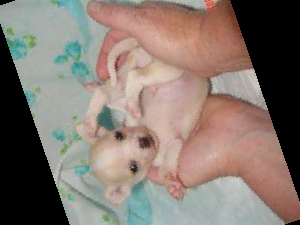

In [11]:
import sys; sys.path.insert(0, '..')
from src.image import add_image_transformations
import torchvision
import torch
import numpy as np

image_index = 6

from src.dog_data_set import DogPoseDataSet

dog_pose_train_data_set = DogPoseDataSet(
    images_dir = "../data/Images/", 
    np_split_file="../data/annotations/train_stanford_StanfordExtra_v12.npy", 
    annotations_json_file="../data/annotations/StanfordExtra_v12.json")

first_sample = None

for i, sample in enumerate(dog_pose_train_data_set):
    first_sample = sample
    if (i == image_index):
        break

sample_image_transformed = add_image_transformations(first_sample['image'])

display(torchvision.transforms.functional.to_pil_image(sample_image_transformed))

joints:  [(446, 300, 300.8479233822219), (341, 317, 317.1604656380268), (0, 0, 0), (444, 247, 247.51762508626763), (343, 235, 235.70802637890174), (0, 0, 0), (0, 0, 0), (177, 290, 290.3131802884968), (238, 228, 228.20532479678167), (159, 310, 310.57256393127665), (0, 0, 0), (0, 0, 0)]


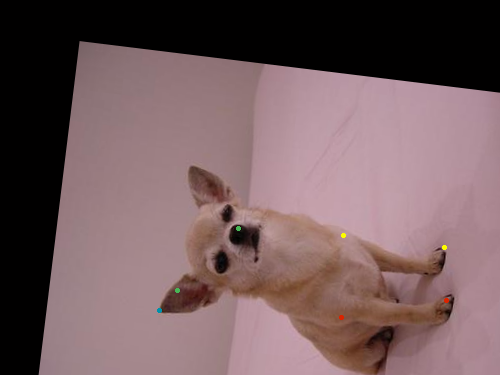

In [12]:
from src.augment import Augment
from torchvision import transforms
from src.keypoints import get_keypoint_definitions
from src.image import add_bbox_and_keypoints

composed_transforms = transforms.Compose([Augment({"Flip": True, "Rotate": True})])

dog_pose_train_data_set_resized = DogPoseDataSet(
    images_dir = "../data/Images/", 
    np_split_file="../data/annotations/train_stanford_StanfordExtra_v12.npy", 
    annotations_json_file="../data/annotations/StanfordExtra_v12.json",
    transform=composed_transforms)

keypoint_defs = get_keypoint_definitions('../data/annotations/keypoint_definitions.csv')
keypoint_colors = keypoint_defs['colors']

augmented_sample = None

for i, sample in enumerate(dog_pose_train_data_set_resized):
    augmented_sample = sample
    if (i == 50):
        break

image_with_bbox = add_bbox_and_keypoints(augmented_sample['image'], augmented_sample['img_bbox'], augmented_sample['joints'], keypoint_colors)
display(torchvision.transforms.functional.to_pil_image(image_with_bbox))